# 프로그래밍을 이용한 주사위 던지기 모의실험

모의실험을 이용하여 "주사위 6번 던지기"를 반복적으로 실행할 때 숫자 1이 나오는 횟수의 평균의 분포를 확인하고자 한다.
즉, 주사위를 6번 던져서 숫자 1이 평균 1회 나와야 한다는 사실을 실험을 통해 확인한다.
또한, 주사위를 6번 던져서 숫자 1이 나오는 횟수의 평균분포가 정규분포를 따른다는 사실을 실험적으로 확인한다.

## 파이썬 프로그래밍 안내

모의실험은 파이썬(Python)이라는 언어를 이용하며, 두 가지 방식으로 제공된다.

* 방식 1: 파이썬의 아주 기초적인 명령어만 사용한다.
    * 이 방식은 파이썬의 기본만 설치하면 실행할 수 있다.
    * 파이썬 기본은 아래 사이트에서 무료로 다운받아 설치할 수 있다.
    > https://www.python.org/downloads/
    * 위 사이트에는 파이썬 3.6.x 버전과 2.7.x 버전이 제공된다. 
        아래 코드를 실행하기 위해서는 어느 버전도 상관이 없다. 
        다만 앞으로 3점대 버전이 점점 더 많이 사용된다는 점만 고려하면 된다.


* 방식 2: 파이썬의 고급 기능을 활용한다.
    * 이 방식은 파이썬 기본 팩키지 이외에 추가 라이브러리를 요구한다.
    * 파이썬 기본을 설치하는 대신에 아래 사이트에서 무료로 다운 받아 설치할 수 있는 
        아나콘다(Anaconda) 팩키지를 사용하면 된다.
        > https://www.anaconda.com/download/
    * 아나콘다 팩키지는 파이썬 기본과 더불어 데이터분석을 위한 통계 팩키지 등을 추가로 함께 설치한다.
    * 위 사이트 또한 파이썬 3.6.x 버전과 2.7.x 버전이 제공한다. 
        아래 코드를 실행하기 위해서는 어느 버전도 상관이 없다. 
        다만 앞으로 3점대 버전이 점점 더 많이 사용된다는 점만 고려하면 된다. 
    * 참고사항: 방식 2는 컴퓨터공학과 2학년 2학기 교육과정의 공업수학에서 다루는 
        "파이썬을 활용한 데이터분석"에 포함되는 내용이다.

**주의:** 파이썬 3점대 버전을 사용한다면 아래 코드는 필요 없다.

In [1]:
from __future__ import print_function, division

## 방식 1

**참고:** 이 방식은 육현진 학생(회장님)이 직접 작성한 코드를 응용하였다.

### 주사위 6번 던지기

숫자를 무작위로 생성하거나 선택하는 함수가 필요하며, 여기서는 random 모듈의 choice 함수를 활용한다.

In [2]:
import random

주사위에는 1부터 6까지는 숫자가 있으며, 이것을 모델링 해야 한다.
아래 dice 변수가 주사위 모델을 대행한다.

**주의:** `[1, 2, 3, 4, 5, 6]`은 1~6의 숫자를 담고 있는 리스트이다.

In [3]:
dice = [1, 2, 3, 4, 5, 6]

주사위를 굴리면 숫자가 임의로 결정된다. 
이것은 choice 함수를 활용하여 1~6 사이의 숫자를 임의로 선택하게 하는 방식으로 구현한다.

예를 들어, 아래 코드는 주사위를 한 번 굴리는 것을 모델링한다.

In [4]:
random.choice(dice)

1

choice 함수는 실행할 때마다 dice 에서 임의로 하나를 선택해서 되돌려 준다.

In [5]:
random.choice(dice)

4

"주사위 6번 던지기"는 for-반복문을 이용하여 아래와 같이 구현할 수 있다.

코드 설명:

* `dice_throwing`: 주사위를 여러 번 던지는 것을 구현한 함수이다.
    * 인자: 정수를 입력하면 입력된 숫자만큼 주사위를 던진다.
    * 리턴값: 주사위를 던질 때마다 나온 결과를 모아 둔 리스트를 리턴한다.
* `results` 변수: 주사위를 던져서 나온 결과들을 담는 리스트
* `append` 함수: 리스트에 값을 추가하는 기능을 가진 함수
* `range(num)`: `[0, ..., num-1]`의 리스트라고 생각하면 된다.

In [6]:
def dice_throwing(num):
    results = []

    for i in range(num):
        a_dice_throwing = random.choice(dice)
        results.append(a_dice_throwing)

    return results

위 함수를 이용하여 코드 6번 던지기를 구현하는 것은 매우 쉽다.

In [7]:
dice_throwing(6)

[6, 6, 5, 1, 3, 6]

위 함수를 호출할 때마다 다른 결과가 나온다.

In [8]:
dice_throwing(6)

[6, 5, 6, 1, 6, 6]

리스트에 특정 항목이 나오는 횟수를 세는 count라는 함수가 존재하며, 사용방식은 다음과 같다.

In [9]:
dice_throwing(6).count(1)

2

In [10]:
dice_throwing(6).count(1)

0

### "주사위 6번 던지기"를 반복하기

"주사위 6번 던지기"를 원하는 횟수만큼 반복하기를 구현하도록 하자.

`dice_experiment` 함수 설명
* 인자: `num1`과 `num2`
    * `num1`: 주사위를 `num1`번 던지기를 위해 사용됨.
    * `num2`: "주사위 `num1`번 던지기"를 `num2`번 반복하기 
* `count_ones`: "주사위 `num1`번 던지기`를 할 때마다 숫자 1이 나온 횟수를 저장하는 리스트

In [11]:
def dice_experiment(num1, num2):

    count_ones = []
    
    for times in range(num2):
        experiment = dice_throwing(num1)
        num_of_ones = experiment.count(1)
        count_ones.append(num_of_ones)
    
    return count_ones

"주사위 6번 던지기"를 30번 반복한 결과는 아래와 같이 구한다.

In [12]:
print(dice_experiment(6, 30))

[2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 3, 0, 2, 0]


실험결과의 평균값은 아래 함수를 활용한다.

In [13]:
def dice_experiment_mean(num1, num2):
    exp_mean = sum(dice_experiment(num1, num2)) / num2
    return exp_mean

"주사위 6번 던지기"를 30번 반복할 때 숫자 1이 나오는 횟수의 평균값은 아래와 같이 구한다.

**주의:** 아래 코드를 실행할 때마다 값이 달라진다.

In [14]:
dice_experiment_mean(6, 30)

0.9333333333333333

## 방식 2

이 방식은 파이썬 초보자가 이해하기에는 어려울 수 있는 고급기술이 포함되어 있다.
하지만 설명 위주로 보면 충분히 내용을 이해할 수 있다.

### 주사위 6번 던지기

주사위를 던지면 1에서 6까지의 정수가 무작위로 나온다.
이런 성질을 코딩에서는 "난수 생성"으로 구현할 수 있다.

모든 프로그래밍언어네는 난수를 생성하는 기능이 들어 있으며, 여기서는 파이썬(Python)이라는 언어를 사용한다. 

#### 파이썬에서 무작위로 숫자 생성하기

numpy라는 라이브러리에서 제공하는 randint 함수를 이용하여 지정된 구간에서 정수를 무작위로 생성할 수 있다.

In [15]:
import numpy as np

예를 들어, 아래 코드는 0과 10 사이의 정수를 무작위적으로 5개 생성한다.

주의:
* 0은 포함됨
* 10은 포함되지 않음

In [16]:
np.random.randint(0, 10, 5)

array([7, 5, 0, 4, 5])

따라서 주사위를 6번 던진 결과를 생성하는 코드는 다음과 같다.

In [17]:
cube_6_times = np.random.randint(1,7,6)

In [18]:
cube_6_times

array([3, 2, 5, 3, 1, 5])

### "주사위 6번 던지기"를 반복하기

"주사위 6번 던지기"를 원하는 횟수만큼 반복하기를 구현하도록 하자.
dice_experiment 함수에 대한 설명은 버전1에서의 설명과 동일하다.

In [19]:
def dice_experiment(num1, num2):

    count_ones = np.empty([num2,], dtype=float)
    
    for times in np.arange(num2):
        experiment = np.random.randint(1,7,num1)
        count_ones[times] = experiment[experiment==1].shape[0]
    
    return count_ones

In [20]:
print(dice_experiment(6, 30))

[ 2.  1.  1.  2.  1.  0.  2.  0.  1.  0.  1.  0.  0.  1.  2.  0.  1.  0.
  0.  1.  1.  2.  2.  2.  1.  3.  2.  1.  1.  0.]


### 표본평균의 분포

그래프 관련 라이브러리가 필요하다.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes = True)

'주사위 6번 던지기'를 30번 반복했을 때 1이 나온 평균들의 분포를 알아보자.

표본평균의 분포를 그래프로 확인하기 위해 "'주사위 6번 던지기'를 30번 반복하기"를 1000번 정도 해보도록 하자.

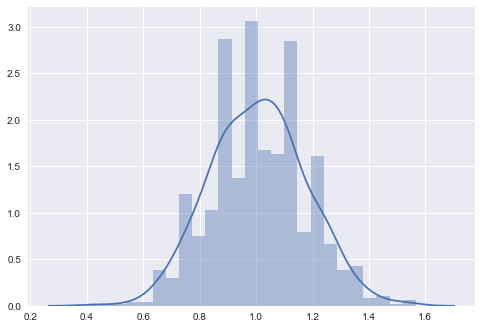

In [22]:
count_ones_mean = np.empty([1000, ], dtype=float)

for times in np.arange(1000):
    count_ones_mean[times] = dice_experiment(6, 30).mean()

sns.distplot(count_ones_mean, kde=True)

### 신뢰구간


"동전 6번 던지기"를 30번 반복했을 때 숫자 1이 나오는 평균횟수의 신뢰구간을 다음과 같이 구할 수 있다.
신뢰수준은 95%를 사용한다.

In [23]:
from scipy import stats

In [24]:
dice_6_30 = dice_experiment(6,30)
stats.norm.interval(0.95, loc=dice_6_30.mean(), scale=dice_6_30.std()/np.sqrt(30))

(0.68214041525950175, 1.2511929180738317)